In [ ]:
import gym
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

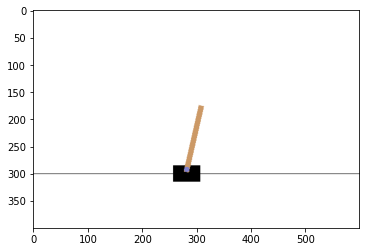

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
episodes = 5
for episode in range(1, episodes+1):
  state = env.reset()
  done = Falsescore = 0
  score = 0

  while not done:
    env.render()
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:18.0
Episode:2 Score:17.0
Episode:3 Score:19.0
Episode:4 Score:25.0
Episode:5 Score:18.0


In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)  

Using cpu device


In [ ]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 508  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 638          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0081839785 |
|    clip_fraction        | 0.085        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | -0.00237     |
|    learning_rate        | 0.0003       |
|    loss                 | 6.3          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0128      |
|    value_loss           | 44.2         |
----------------------------

In [ ]:
model.save("my_model_cart_pole")

In [21]:
episodes = 5
for episode in range(1, episodes+1):
  obs = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:[200.]
Episode:2 Score:[200.]
Episode:3 Score:[200.]
Episode:4 Score:[200.]
Episode:5 Score:[200.]
